In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def quantize(float_value, min_range, max_range, zero = 0):
    s = (max_range - min_range) / (2**8 - 1)
    return (float_value / s).astype(np.int8)

def to_float(uint_values, min_range, max_range):
    s = (max_range - min_range) / (2**8 - 1)
    return uint_values * s

In [28]:
def display_error_histogram(values: np.ndarray, min_range: float, max_range: float):
    base_values = values
    quantized_values = quantize(base_values, min_range, max_range)
    plt.hist(base_values - to_float(quantized_values, min_range, max_range), bins=100)
    plt.title("Error histogram")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()

def quantization_error_stats(values: np.ndarray, min_range: float, max_range: float):
    base_values = values
    quantized_values = quantize(base_values, min_range, max_range)
    error = base_values - to_float(quantized_values, min_range, max_range)
    return np.mean(error), np.std(error)

(0.4938264685883528, 0.5018924710646971)


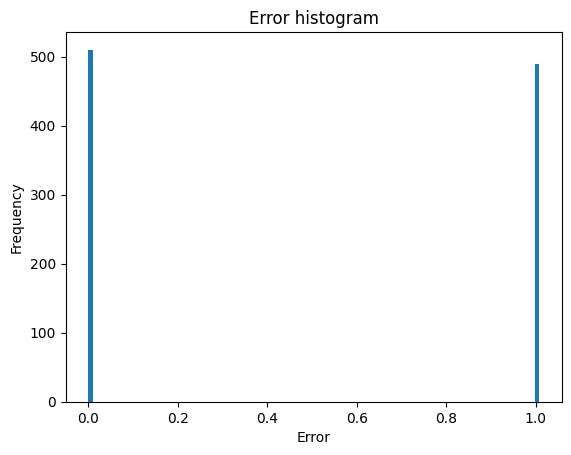

In [29]:
case_1 = np.random.uniform(0, 1, 1000)
print(quantization_error_stats(case_1, 0, 1))
display_error_histogram(case_1, 0, 1)

(0.9788321163711978, 0.6899163602778458)


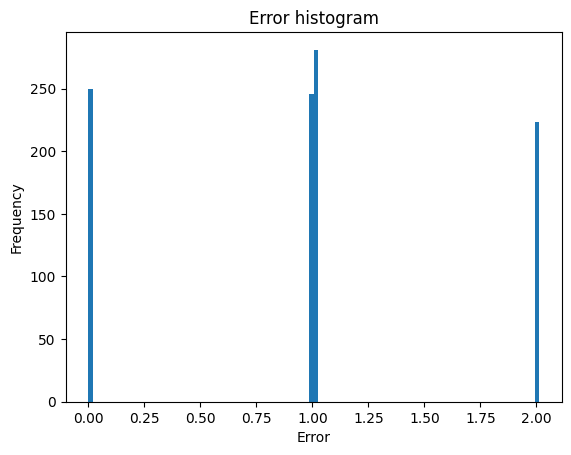

In [ ]:
case_2 = np.random.uniform(0, 2, 1000)
print(quantization_error_stats(case_2, 0, 1))
display_error_histogram(case_2, 0, 1)

(0.9650242732339429, 0.5699992596965883)


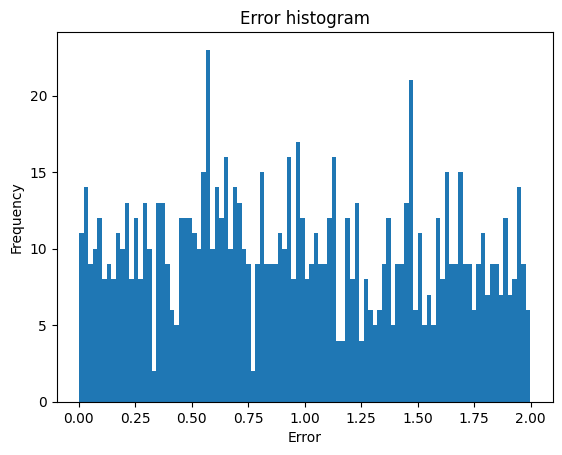

In [32]:
case_3 = np.random.uniform(100, 101, 1000)
print(quantization_error_stats(case_2, 0, 1000))
display_error_histogram(case_2, 0, 1000)

(0.5070242732339428, 0.28771562265861383)


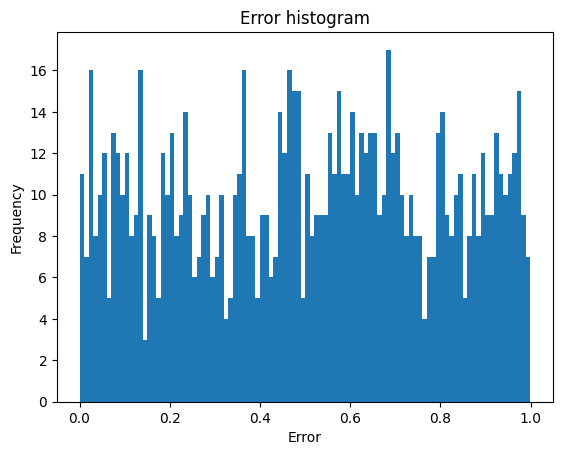

In [41]:
# INT 16 to INT 8
case_4 = np.random.randint(-32768, 32767, 1000)
print(quantization_error_stats(case_2, -127, 128))
display_error_histogram(case_2, -127, 128)